In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
palette=sns.diverging_palette(30, 250, s=80, l=65, center="light", as_cmap=True)
sns.set_theme()

In [3]:
#reading the file and getting information about the schema
filename1="D:/Python/Twitch_game_data.csv"
twitch_game_data=pd.read_csv(filename1,encoding='cp1252')
twitch_game_data.info()
twitch_game_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              17000 non-null  int64 
 1   Game              16999 non-null  object
 2   Month             17000 non-null  int64 
 3   Year              17000 non-null  int64 
 4   Hours_watched     17000 non-null  object
 5   Hours_Streamed    17000 non-null  object
 6   Peak_viewers      17000 non-null  object
 7   Peak_channels     17000 non-null  object
 8   Streamers         17000 non-null  object
 9   Avg_viewers       17000 non-null  object
 10  Avg_channels      17000 non-null  object
 11  Avg_viewer_ratio  17000 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [4]:
filename2='D:/Python/Twitch_global_data.csv'
twitch_global_data=pd.read_csv(filename2,encoding='cp1252')
twitch_global_data.info()
twitch_global_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            85 non-null     int64  
 1   Month           85 non-null     int64  
 2   Hours_watched   85 non-null     int64  
 3   Avg_viewers     85 non-null     int64  
 4   Peak_viewers    85 non-null     int64  
 5   Streams         85 non-null     int64  
 6   Avg_channels    85 non-null     int64  
 7   Games_streamed  85 non-null     int64  
 8   Viewer_ratio    85 non-null     float64
dtypes: float64(1), int64(8)
memory usage: 6.1 KB


,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98
2,2016,3,490669308,660389,1591551,7390957,20271,12234,28.92
3,2016,4,377975447,525696,1775120,6869719,16791,12282,28.80
4,2016,5,449836631,605432,1438962,7535519,19394,12424,28.85


In [5]:
twitch_game_data[twitch_game_data.Game.isnull()]

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
7561,162,NaN,2,2019,317951,77004,30919,5804,21758,473,114,4.13


In [6]:
twitch_game_data=twitch_game_data.dropna()

In [7]:
twitch_game_data[['Hours_watched','pa1']]=twitch_game_data['Hours_watched'].str.split("(", expand = True)
twitch_game_data[['Hours_Streamed','pa2']]=twitch_game_data['Hours_Streamed'].str.split("(", expand = True)
twitch_game_data[['Peak_viewers','pa3']]=twitch_game_data['Peak_viewers'].str.split("(", expand = True)
twitch_game_data[['Peak_channels','pa4']]=twitch_game_data['Peak_channels'].str.split("(", expand = True)
twitch_game_data[['Streamers','pa5']]=twitch_game_data['Streamers'].str.split("(", expand = True)
twitch_game_data[['Avg_viewers','pa6']]=twitch_game_data['Avg_viewers'].str.split("(", expand = True)
twitch_game_data[['Avg_channels','pa7']]=twitch_game_data['Avg_channels'].str.split("(", expand = True)
twitch_game_data[['Avg_viewer_ratio','pa8']]=twitch_game_data['Avg_viewer_ratio'].str.split("(", expand = True)
twitch_game_data.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,pa1,pa2,pa3,pa4,pa5,pa6,pa7,pa8
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29,None,None,None,None,None,None,None,None
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,None,None,None,None,None,None,None,None
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,None,None,None,None,None,None,None,None
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29,None,None,None,None,None,None,None,None
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,None,None,None,None,None,None,None,None


In [8]:
twitch_game_data['Hours_watched']=twitch_game_data['Hours_watched'].astype(int)
twitch_game_data['Hours_Streamed']=twitch_game_data['Hours_Streamed'].astype(int)
twitch_game_data['Peak_viewers']=twitch_game_data['Peak_viewers'].astype(int)
twitch_game_data['Peak_channels']=twitch_game_data['Peak_channels'].astype(int)
twitch_game_data['Streamers']=twitch_game_data['Streamers'].astype(int)
twitch_game_data['Avg_viewers']=twitch_game_data['Avg_viewers'].astype(int)
twitch_game_data['Avg_channels']=twitch_game_data['Avg_channels'].astype(int)
twitch_game_data['Avg_viewer_ratio']=twitch_game_data['Avg_viewer_ratio'].astype(float)
twitch_game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16999 entries, 0 to 16999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16999 non-null  int64  
 1   Game              16999 non-null  object 
 2   Month             16999 non-null  int64  
 3   Year              16999 non-null  int64  
 4   Hours_watched     16999 non-null  int32  
 5   Hours_Streamed    16999 non-null  int32  
 6   Peak_viewers      16999 non-null  int32  
 7   Peak_channels     16999 non-null  int32  
 8   Streamers         16999 non-null  int32  
 9   Avg_viewers       16999 non-null  int32  
 10  Avg_channels      16999 non-null  int32  
 11  Avg_viewer_ratio  16999 non-null  float64
 12  pa1               2479 non-null   object 
 13  pa2               2445 non-null   object 
 14  pa3               2507 non-null   object 
 15  pa4               2441 non-null   object 
 16  pa5               2451 non-null   object 
 17

In [9]:
twitch_game_data.drop(['pa1','pa2','pa3','pa4','pa5','pa6','pa7','pa8'], axis=1, inplace=True)
twitch_game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16999 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16999 non-null  int64  
 1   Game              16999 non-null  object 
 2   Month             16999 non-null  int64  
 3   Year              16999 non-null  int64  
 4   Hours_watched     16999 non-null  int32  
 5   Hours_Streamed    16999 non-null  int32  
 6   Peak_viewers      16999 non-null  int32  
 7   Peak_channels     16999 non-null  int32  
 8   Streamers         16999 non-null  int32  
 9   Avg_viewers       16999 non-null  int32  
 10  Avg_channels      16999 non-null  int32  
 11  Avg_viewer_ratio  16999 non-null  float64
dtypes: float64(1), int32(7), int64(3), object(1)
memory usage: 1.2+ MB


In [10]:
twitch_game_data.Year = twitch_game_data.Year.astype(CategoricalDtype(ordered = True))
twitch_game_data.Month = twitch_game_data.Month.astype(CategoricalDtype(ordered = True))
twitch_game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16999 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Rank              16999 non-null  int64   
 1   Game              16999 non-null  object  
 2   Month             16999 non-null  category
 3   Year              16999 non-null  category
 4   Hours_watched     16999 non-null  int32   
 5   Hours_Streamed    16999 non-null  int32   
 6   Peak_viewers      16999 non-null  int32   
 7   Peak_channels     16999 non-null  int32   
 8   Streamers         16999 non-null  int32   
 9   Avg_viewers       16999 non-null  int32   
 10  Avg_channels      16999 non-null  int32   
 11  Avg_viewer_ratio  16999 non-null  float64 
dtypes: category(2), float64(1), int32(7), int64(1), object(1)
memory usage: 1.0+ MB


<Axes: >

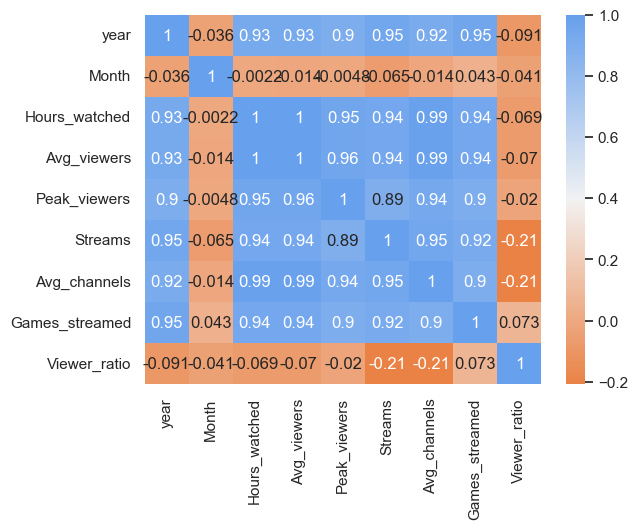

In [33]:
sns.heatmap(twitch_global_data.corr(),annot=True,cmap=palette)


<Axes: xlabel='Viewer_ratio', ylabel='Hours_watched'>

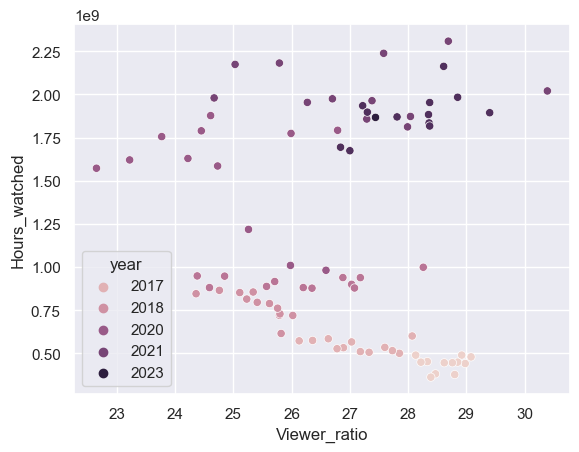

In [15]:
sns.scatterplot(data=twitch_global_data,y='Hours_watched',x='Viewer_ratio',hue='year')

c:\Users\murad_asal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


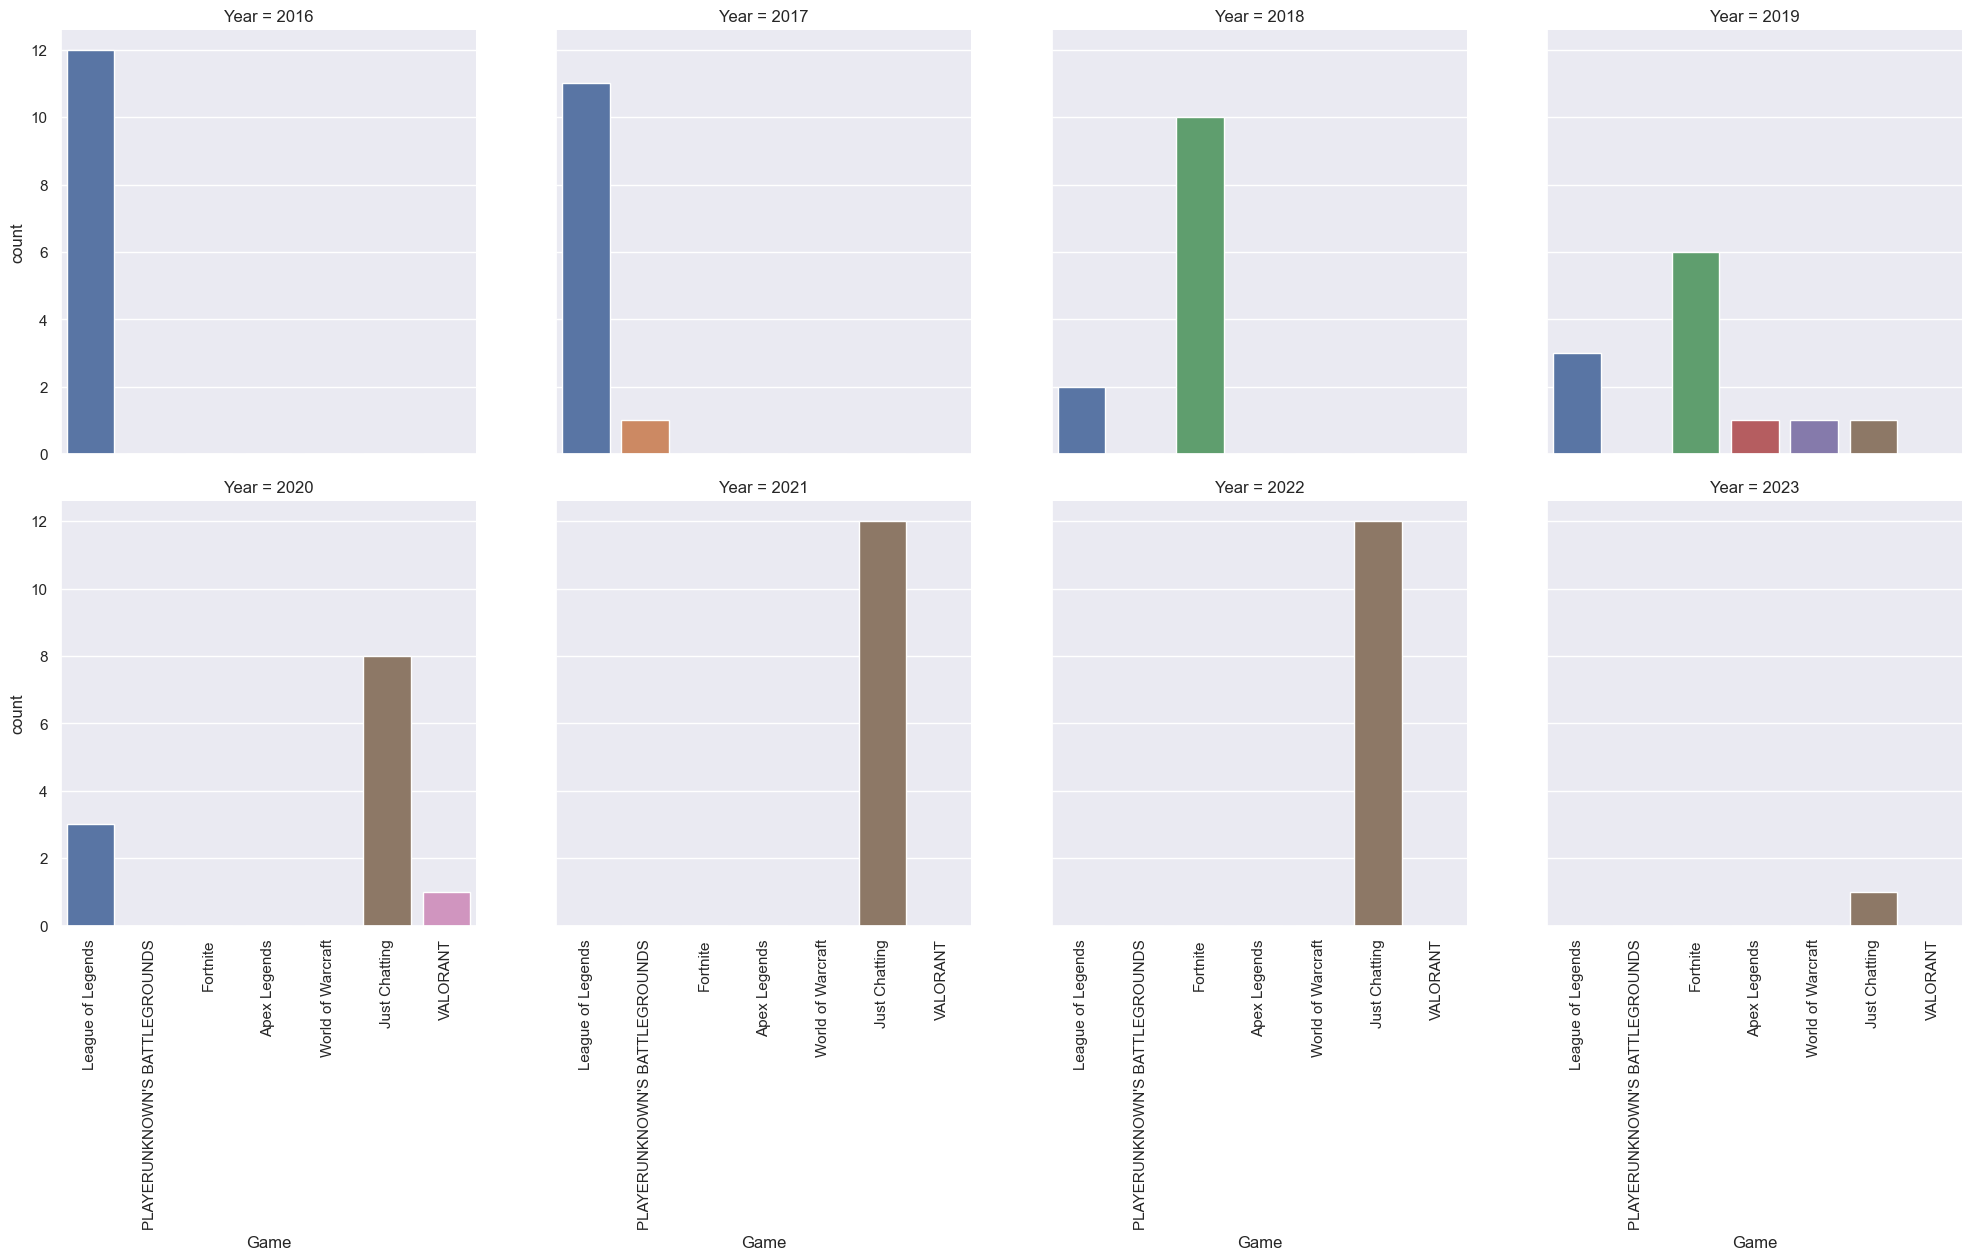

In [47]:
g=sns.catplot(kind='count',data=twitch_game_data[twitch_game_data['Rank']==1],x='Game',col='Year',col_wrap=4)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)


<Axes: xlabel='Hours_watched'>

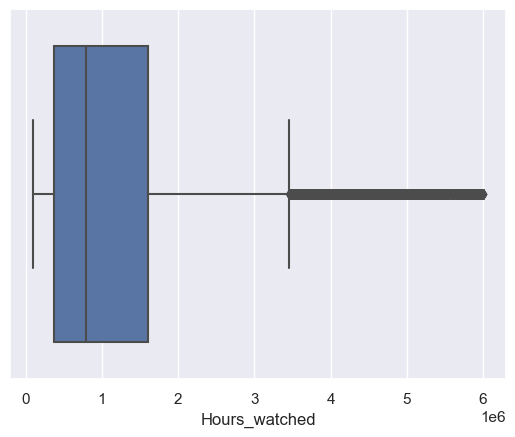

In [38]:
hours_watched_twenty_five = twitch_game_data['Hours_watched'].quantile(0.25)
hours_watched_seventy_five = twitch_game_data['Hours_watched'].quantile(0.75)
hours_watched_iqr = hours_watched_seventy_five - hours_watched_twenty_five
upper = hours_watched_seventy_five + (1.5 * hours_watched_iqr)
lower = hours_watched_twenty_five - (1.5 * hours_watched_iqr)
sns.boxplot(data=twitch_game_data[(twitch_game_data['Hours_watched'] > lower) & (twitch_game_data['Hours_watched'] < upper)],x='Hours_watched')

<Axes: xlabel='Hours_Streamed'>

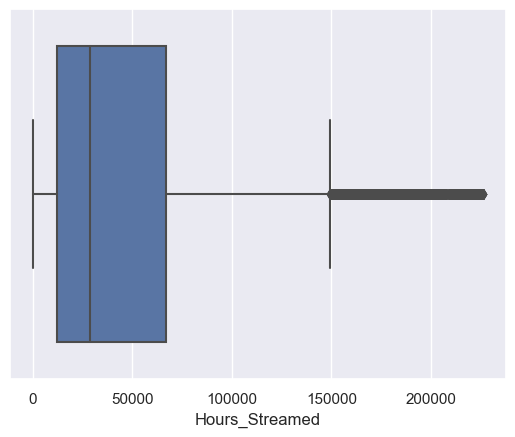

In [39]:
hours_streamed_twenty_five = twitch_game_data['Hours_Streamed'].quantile(0.25)
hours_streamed_seventy_five = twitch_game_data['Hours_Streamed'].quantile(0.75)
hours_streamed_iqr = hours_streamed_seventy_five - hours_streamed_twenty_five
upper = hours_streamed_seventy_five + (1.5 * hours_streamed_iqr)
lower = hours_streamed_twenty_five - (1.5 * hours_streamed_iqr)
sns.boxplot(data=twitch_game_data[(twitch_game_data['Hours_Streamed'] > lower) & (twitch_game_data['Hours_Streamed'] < upper)],x='Hours_Streamed')

c:\Users\murad_asal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


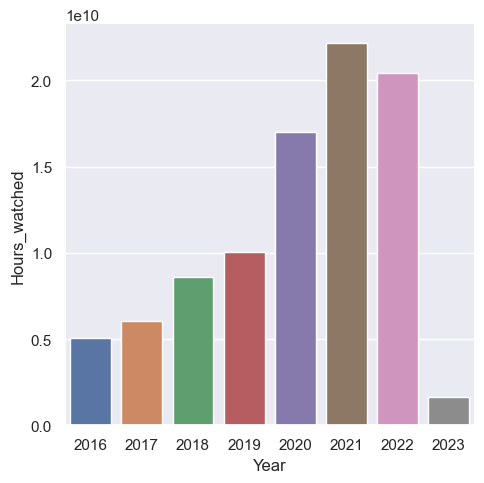

In [48]:
sns.catplot(data=twitch_game_data,x='Year',y='Hours_watched',kind='bar',estimator='sum',errorbar=None)

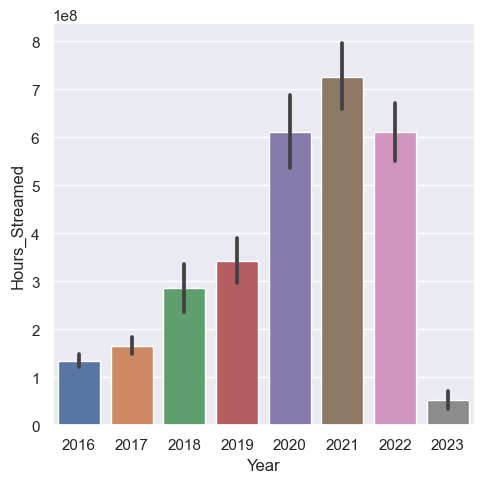

In [84]:
sns.catplot(data=twitch_game_data,x='Year',y='Hours_Streamed',kind='bar',estimator='sum')

c:\Users\murad_asal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


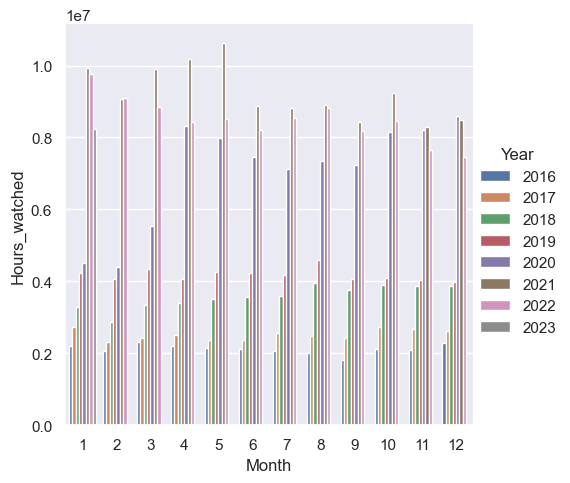

In [10]:
sns.catplot(data=twitch_game_data,x='Month',y='Hours_watched',kind='bar',hue='Year',errorbar=None)

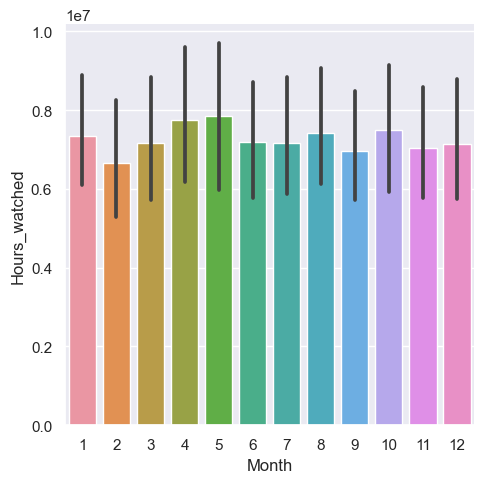

In [79]:
sns.catplot(data=twitch_game_data[(twitch_game_data['Year']>=2019)],x='Month',y='Hours_watched',kind='bar')

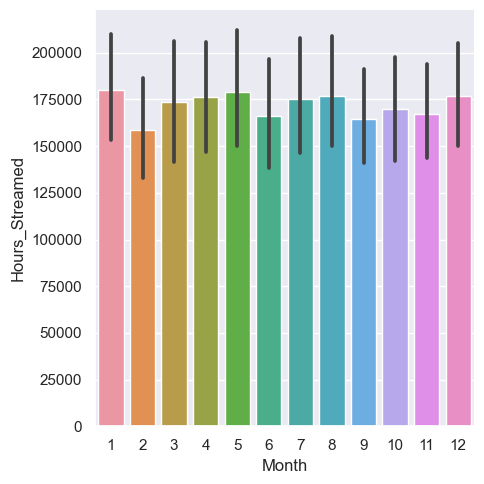

In [71]:
sns.catplot(data=twitch_game_data,x='Month',y='Hours_Streamed',kind='bar')

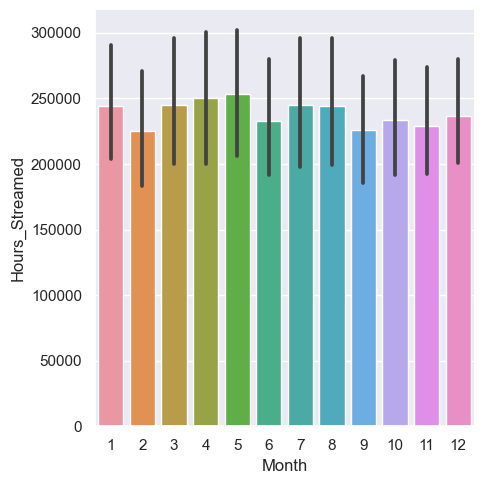

In [80]:
sns.catplot(data=twitch_game_data[(twitch_game_data['Year']>=2019)],x='Month',y='Hours_Streamed',kind='bar')

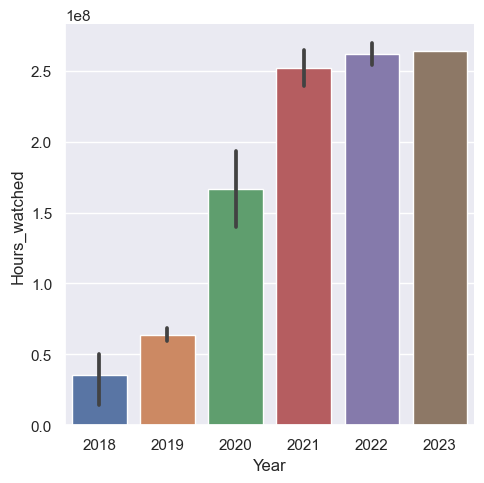

In [89]:
sns.catplot(data=twitch_game_data[(twitch_game_data['Game']=='Just Chatting')],x='Year',y='Hours_watched',kind='bar')

c:\Users\murad_asal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'League of Legends'),
  Text(1, 0, "PLAYERUNKNOWN'S BATTLEGROUNDS"),
  Text(2, 0, 'Fortnite'),
  Text(3, 0, 'Apex Legends'),
  Text(4, 0, 'World of Warcraft'),
  Text(5, 0, 'Just Chatting'),
  Text(6, 0, 'VALORANT')])

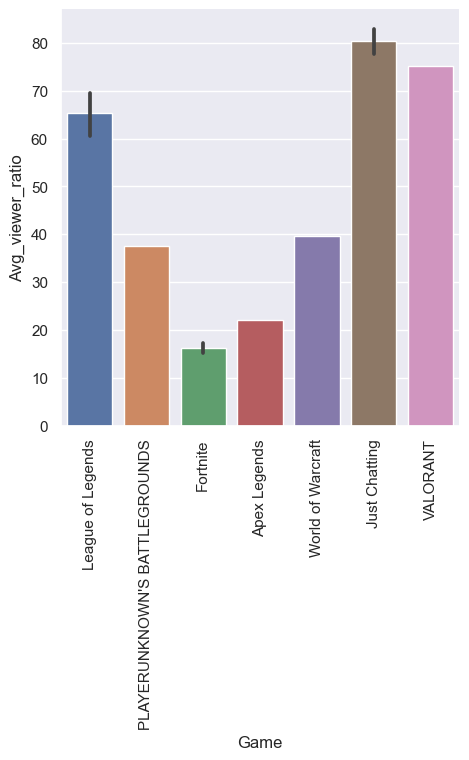

In [31]:
sns.catplot(data=twitch_game_data[twitch_game_data['Rank']==1],x="Game",y='Avg_viewer_ratio',kind='bar')
plt.xticks(rotation=90)

In [98]:
tgd_group_by_game=twitch_game_data.groupby('Game').sum()
tgd_group_by_game['Game']=tgd_group_by_game.index
tgd_group_by_game.drop(['Rank','Year','Month','Avg_viewer_ratio','Peak_viewers','Peak_channels'],axis=1,inplace=True)
tgd_group_by_game[tgd_group_by_game['Game']!='Just Chatting'].sort_values(by=['Hours_watched'],ascending=False).head(10)

,Hours_watched,Hours_Streamed,Streamers,Avg_viewers,Avg_channels,Game
Game,,,,,,
League of Legends,9134076080,178820372,15352671,12520973,245103,League of Legends
Fortnite,5190652561,348941479,41112586,7111205,477994,Fortnite
Grand Theft Auto V,5109235574,88062942,9796848,7001288,120554,Grand Theft Auto V
Counter-Strike: Global Offensive,4026038233,76652663,10346787,5526626,105062,Counter-Strike: Global Offensive
Dota 2,3573109222,41926037,2944043,4894068,57431,Dota 2
VALORANT,3006037104,112082135,10770027,4122963,153494,VALORANT
Minecraft,2381282093,93946674,14733743,3261584,128705,Minecraft
Hearthstone,2277875822,14493008,1634399,3121468,19818,Hearthstone
World of Warcraft,2226134016,72363520,4650436,3047632,99125,World of Warcraft
